# Análisis  de los datos reducidos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
from collections import Counter
from random import random
path = "./Datasets/Saber_reducido.csv"

In [2]:
def pertenece(a, b):
    for i in range(1,len(b)):
        if a>= b[i-1] and a<= b[i]:
            return i-1

def reemplazoGeneralizado(data):
    columns = ["ELECTRODOMESTICOS","ESTU_GENERO", "ESTU_FECHANACIMIENTO", "PERIODO", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "COLE_NATURALEZA", "COLE_CARACTER", "COLE_AREA_UBICACION", "COLE_JORNADA","ESTU_NSE_INDIVIDUAL"]
    for c in columns:
        aux4 =0
        reemplazables = []
        if '-' in data.groupby(c).count().index:
            reemplazables.append(data.groupby(c).get_group('-').index.values)
        opciones = []
        porcentajes = [0]
        opciones.append(list(data.groupby(c).size().axes[0]))
        aux = len(opciones[0])
        if '-' in opciones[0]:
            opciones[0].remove('-')
            aux = aux-1
            aux2 = (data.groupby(c).size()['-']/data.shape[0])/aux
        else:
            continue
        for i in range(aux):
            aux3 = porcentajes.pop()
            porcentajes.append(aux3)
            a= float(data.groupby(c).size()[opciones[0][i]]/data.shape[0])+aux2+aux3
            porcentajes.append(a)
        if len(reemplazables) > 0:   
            for r in reemplazables[0]:
                randNumber = random()
                for j in range(len(opciones[0])):
                    lugar = pertenece(randNumber, porcentajes)
                    data.at[r, c] = opciones[0][lugar]
                                        


In [3]:
Keys = ["ELECTRODOMESTICOS","ESTU_GENERO", "ESTU_FECHANACIMIENTO", "PERIODO", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "COLE_NATURALEZA", "COLE_CARACTER", "COLE_AREA_UBICACION", "COLE_JORNADA", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES", "PUNT_GLOBAL", "ESTU_NSE_ESTABLECIMIENTO", "ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL"]

In [4]:
tmp = ["ESTU_GENERO","ESTU_FECHANACIMIENTO","PERIODO","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE","FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_NUMLIBROS","FAMI_COMELECHEDERIVADOS","FAMI_COMECARNEPESCADOHUEVO","FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_SITUACIONECONOMICA","ESTU_DEDICACIONLECTURADIARIA ","ESTU_DEDICACIONINTERNET","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NATURALEZA COLE_BILINGUE","COLE_CARACTER","COLE_AREA_UBICACION","COLE_JORNADA","PUNT_LECTURA_CRITICA","PERCENTIL_LECTURA_CRITICA","PUNT_MATEMATICAS","PERCENTIL_MATEMATICAS","PUNT_C_NATURALES","PERCENTIL_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PERCENTIL_SOCIALES_CIUDADANAS","PUNT_INGLES","PERCENTIL_INGLES","PUNT_GLOBAL","PERCENTIL_GLOBAL","ESTU_NSE_ESTABLECIMIENTO","ESTU_INSE_INDIVIDUAL","ESTU_NSE_INDIVIDUAL",
]

for element in Keys:
    if element not in tmp:
        print(element)


ELECTRODOMESTICOS
ESTU_DEDICACIONLECTURADIARIA
COLE_NATURALEZA


In [5]:
data = pd.read_csv(path, low_memory=False)

In [6]:
reemplazoGeneralizado(data)

## Discretizacion ESTU_INSE_INDIVIDUAL

In [107]:
# to integer
data['ESTU_INSE_INDIVIDUAL'] = data.apply(lambda x: round(x['ESTU_INSE_INDIVIDUAL'], 0),axis=1)

In [7]:
data.head()

,ELECTRODOMESTICOS,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL
0,10010,M,16,20182,ATLANTICO,Estrato 2,7 a 8,Cuatro,No sabe,No sabe,...,MAÑANA,63,69,54,57,65.0,305,2.0,53.169929,NSE3
1,10010,M,17,20182,CORDOBA,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria completa,...,UNICA,54,50,50,40,48.0,242,2.0,45.062853,NSE2
2,0,M,16,20182,VALLE,Estrato 2,1 a 2,Dos,No sabe,Técnica o tecnológica incompleta,...,MAÑANA,59,43,46,45,47.0,241,2.0,44.806936,NSE2
3,11101,M,17,20182,BOYACA,Estrato 3,3 a 4,Tres,No sabe,Educación profesional completa,...,MAÑANA,61,60,60,67,63.0,310,3.0,73.630225,NSE4
4,10000,M,19,20182,BOGOTA,Estrato 2,7 a 8,Tres,No sabe,No sabe,...,COMPLETA,56,51,48,49,56.0,257,3.0,49.391007,NSE2


In [8]:
data.iloc[0]

ELECTRODOMESTICOS                                                       10010
ESTU_GENERO                                                                 M
ESTU_FECHANACIMIENTO                                                       16
PERIODO                                                                 20182
ESTU_DEPTO_RESIDE                                                   ATLANTICO
FAMI_ESTRATOVIVIENDA                                                Estrato 2
FAMI_PERSONASHOGAR                                                      7 a 8
FAMI_CUARTOSHOGAR                                                      Cuatro
FAMI_EDUCACIONPADRE                                                   No sabe
FAMI_EDUCACIONMADRE                                                   No sabe
FAMI_TRABAJOLABORPADRE           Es vendedor o trabaja en atención al público
FAMI_TRABAJOLABORMADRE           Es vendedor o trabaja en atención al público
FAMI_NUMLIBROS                                                26

In [9]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()  

ESTU_NSE_INDIVIDUAL
NSE1    164551
NSE2    394459
NSE3    375077
NSE4     81232
dtype: int64

In [10]:
type(data.groupby("FAMI_NUMLIBROS").size())

pandas.core.series.Series

In [12]:
#data.groupby("ESTU_GENERO").get_group('-').index.values

In [14]:
data.groupby("FAMI_TRABAJOLABORMADRE").size() 

FAMI_TRABAJOLABORMADRE
Es agricultor, pesquero o jornalero                                                                      28818
Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial                             15211
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc     87618
Es operario de máquinas o conduce vehículos (taxita, chofer)                                             16755
Es vendedor o trabaja en atención al público                                                             78918
No aplica                                                                                                48302
No sabe                                                                                                  25125
Pensionado                                                                                                6710
Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)   

In [15]:
data.groupby("FAMI_EDUCACIONMADRE").size()

FAMI_EDUCACIONMADRE
Educación profesional completa          104941
Educación profesional incompleta         24842
Ninguno                                  21258
No Aplica                                 1802
No sabe                                  17679
Postgrado                                21283
Primaria completa                       112588
Primaria incompleta                     158068
Secundaria (Bachillerato) completa      261750
Secundaria (Bachillerato) incompleta    157364
Técnica o tecnológica completa          102512
Técnica o tecnológica incompleta         31232
dtype: int64

In [16]:
data.groupby("FAMI_EDUCACIONPADRE").size()

FAMI_EDUCACIONPADRE
Educación profesional completa           92498
Educación profesional incompleta         20238
Ninguno                                  34496
No Aplica                                10236
No sabe                                  62911
Postgrado                                18637
Primaria completa                       111526
Primaria incompleta                     201065
Secundaria (Bachillerato) completa      226130
Secundaria (Bachillerato) incompleta    146656
Técnica o tecnológica completa           69813
Técnica o tecnológica incompleta         21113
dtype: int64

In [17]:
data.groupby("FAMI_CUARTOSHOGAR").size()

FAMI_CUARTOSHOGAR
Cinco          40978
Cuatro        134543
Dos           365413
Seis o mas     21844
Tres          399652
Uno            52889
dtype: int64

In [18]:
data.groupby("FAMI_PERSONASHOGAR").size()

FAMI_PERSONASHOGAR
1 a 2       73752
3 a 4      485190
5 a 6      332268
7 a 8       88592
9 o más     35517
dtype: int64

## Histogramas

In [19]:
data.groupby("COLE_JORNADA").size()

COLE_JORNADA
COMPLETA    184979
MAÑANA      523472
NOCHE        48127
SABATINA     53347
TARDE       132572
UNICA        72822
dtype: int64

In [20]:
data.groupby("FAMI_ESTRATOVIVIENDA").size()/data.shape[0] * 100

FAMI_ESTRATOVIVIENDA
Estrato 1      33.231132
Estrato 2      36.629473
Estrato 3      20.492180
Estrato 4       4.705221
Estrato 5       1.550843
Estrato 6       0.745086
Sin Estrato     2.646065
dtype: float64

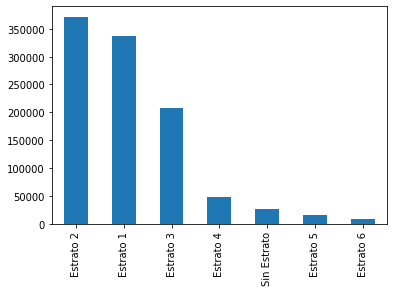

In [21]:
data['FAMI_ESTRATOVIVIENDA'].value_counts().plot(kind='bar')

In [22]:
data.groupby("ESTU_FECHANACIMIENTO").size()

ESTU_FECHANACIMIENTO
14      1376
15     37302
16    373165
17    336231
18    167616
19     63029
20     21248
21      9541
22      5811
dtype: int64

<class 'matplotlib.axes._subplots.AxesSubplot'>


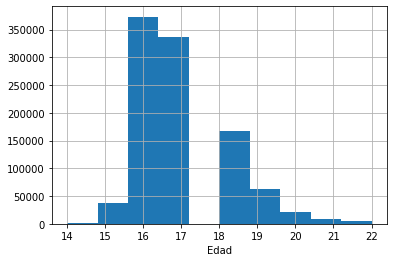

In [23]:
hist = data["ESTU_FECHANACIMIENTO"].hist()
hist.set_xlabel("Edad")
print(type(hist))

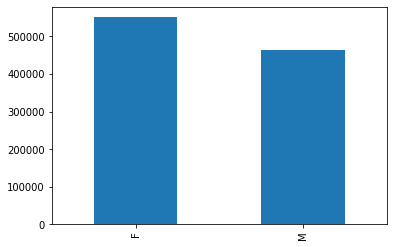

In [24]:
data['ESTU_GENERO'].value_counts().plot(kind='bar')

In [25]:
#data.groupby("ESTU_INSE_INDIVIDUAL").size()
print("min",data["ESTU_INSE_INDIVIDUAL"].min())
print("max",data["ESTU_INSE_INDIVIDUAL"].max())


min 12.53886749
max 84.83636609


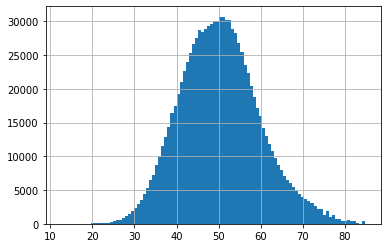

In [26]:
data['ESTU_INSE_INDIVIDUAL'].hist(bins = 100)

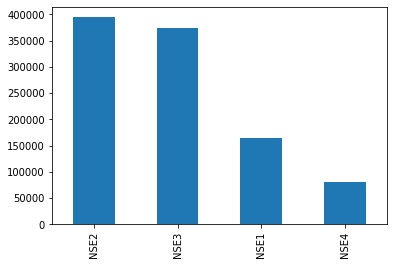

In [27]:
data["ESTU_NSE_INDIVIDUAL"].value_counts().plot(kind ='bar')

In [28]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()

ESTU_NSE_INDIVIDUAL
NSE1    164551
NSE2    394459
NSE3    375077
NSE4     81232
dtype: int64

In [29]:
n = len(data.groupby("ESTU_NSE_ESTABLECIMIENTO").size())
for i in range(1,n+1):
    print(data.groupby("ESTU_NSE_ESTABLECIMIENTO").size()[i])

72076
545146
351248
45744


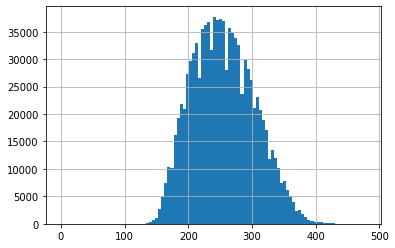

In [30]:
data["PUNT_GLOBAL"].hist(bins = 100)

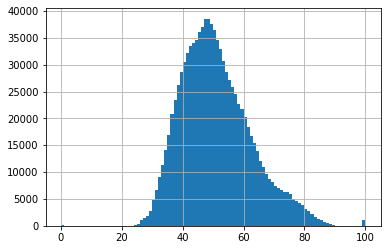

In [31]:
data["PUNT_INGLES"].hist(bins = 100)

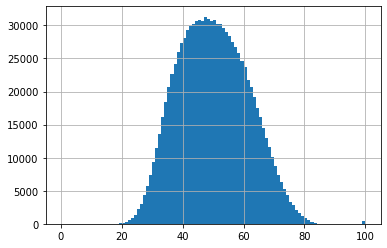

In [32]:
data["PUNT_SOCIALES_CIUDADANAS"].hist(bins = 100)

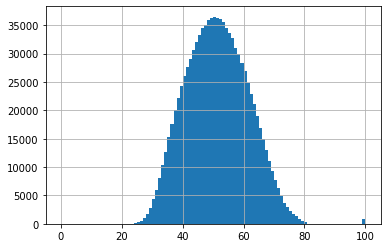

In [33]:
data["PUNT_C_NATURALES"].hist(bins = 100)

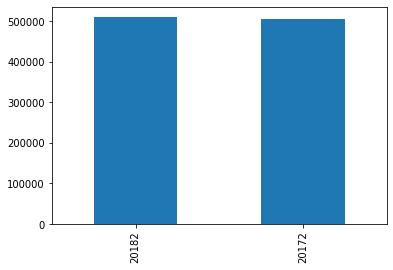

In [34]:
data["PERIODO"].value_counts().plot(kind ='bar')

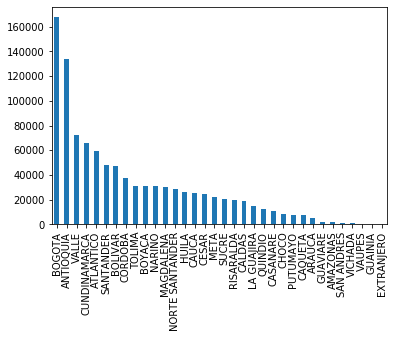

In [35]:
data["ESTU_DEPTO_RESIDE"].value_counts().plot(kind ='bar')

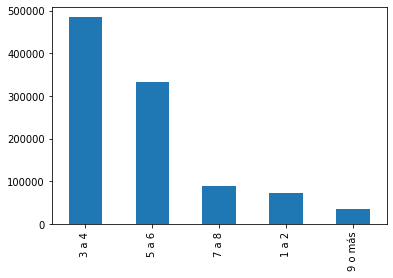

In [36]:
data["FAMI_PERSONASHOGAR"].value_counts().plot(kind ='bar')

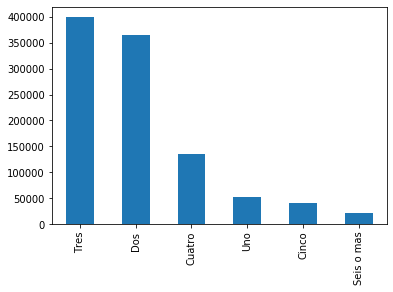

In [37]:
data["FAMI_CUARTOSHOGAR"].value_counts().plot(kind ='bar')

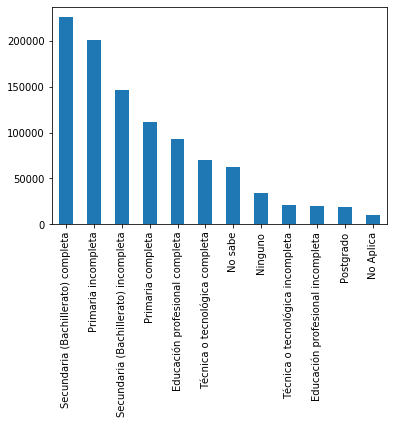

In [38]:
data["FAMI_EDUCACIONPADRE"].value_counts().plot(kind ='bar')

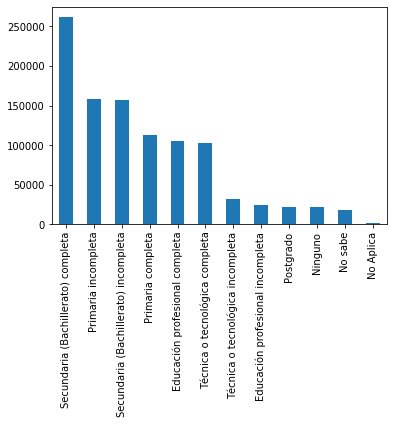

In [39]:
data["FAMI_EDUCACIONMADRE"].value_counts().plot(kind ='bar')

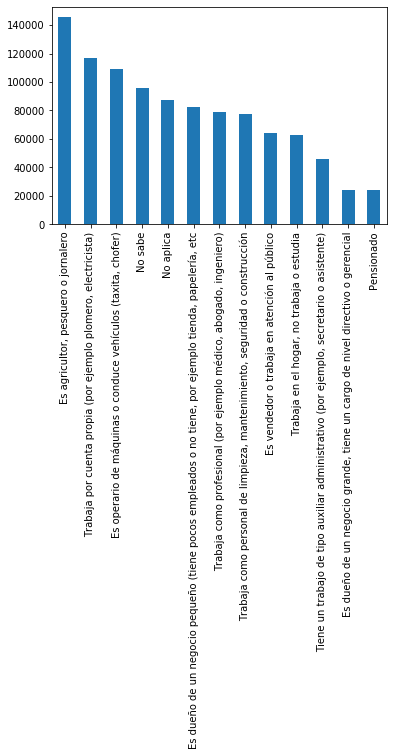

In [40]:
data["FAMI_TRABAJOLABORPADRE"].value_counts().plot(kind ='bar')


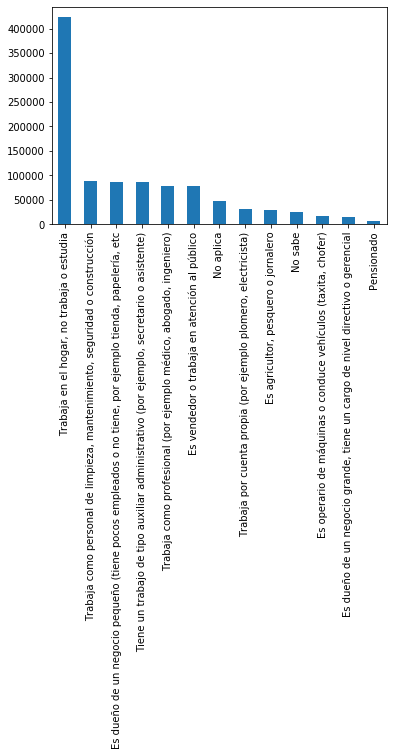

In [41]:
data["FAMI_TRABAJOLABORMADRE"].value_counts().plot(kind ='bar')

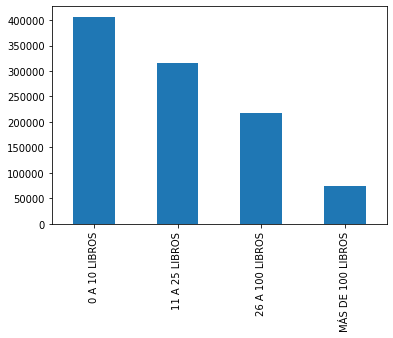

In [42]:
data["FAMI_NUMLIBROS"].value_counts().plot(kind ='bar')

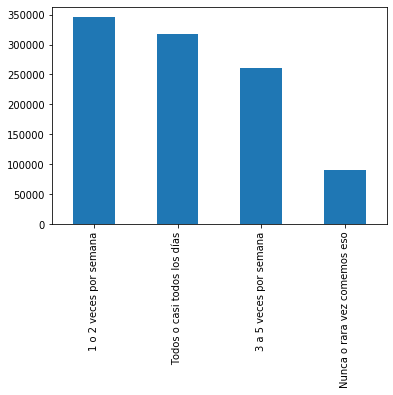

In [43]:
data["FAMI_COMELECHEDERIVADOS"].value_counts().plot(kind ='bar')

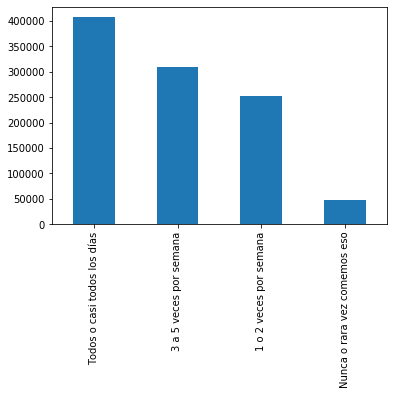

In [44]:
data["FAMI_COMECARNEPESCADOHUEVO"].value_counts().plot(kind ='bar')

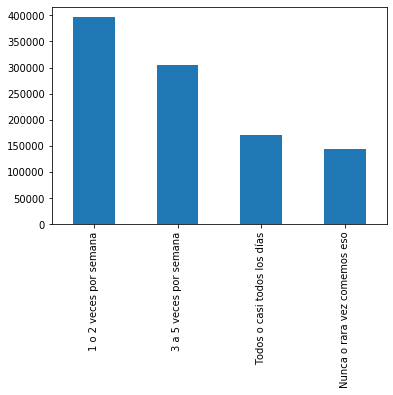

In [45]:
data["FAMI_COMECEREALFRUTOSLEGUMBRE"].value_counts().plot(kind ='bar')

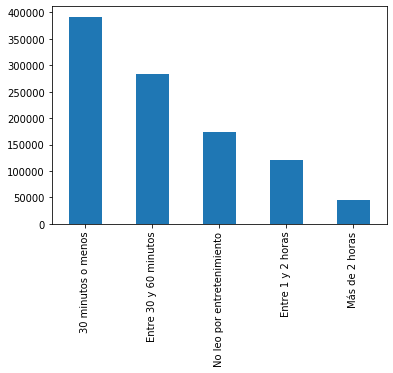

In [46]:
data["ESTU_DEDICACIONLECTURADIARIA"].value_counts().plot(kind ='bar')

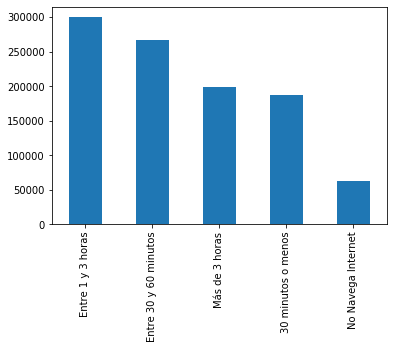

In [47]:
data["ESTU_DEDICACIONINTERNET"].value_counts().plot(kind ='bar')

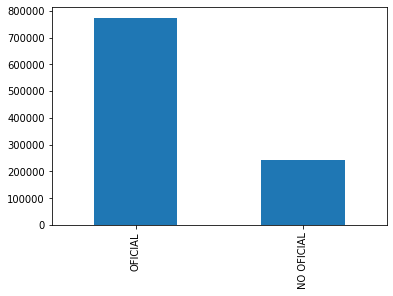

In [48]:
data["COLE_NATURALEZA"].value_counts().plot(kind ='bar')

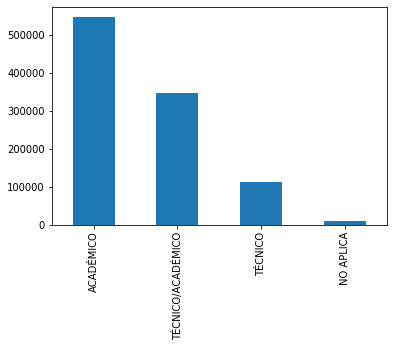

In [49]:
data["COLE_CARACTER"].value_counts().plot(kind ='bar')

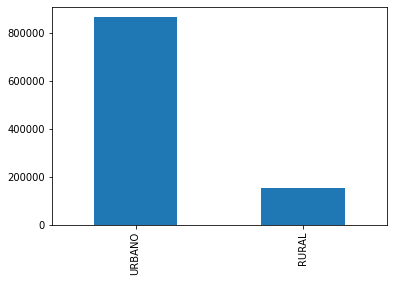

In [50]:
data["COLE_AREA_UBICACION"].value_counts().plot(kind ='bar')

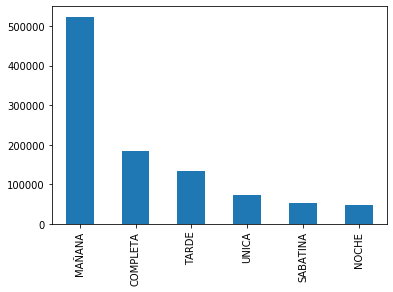

In [51]:
data["COLE_JORNADA"].value_counts().plot(kind ='bar')

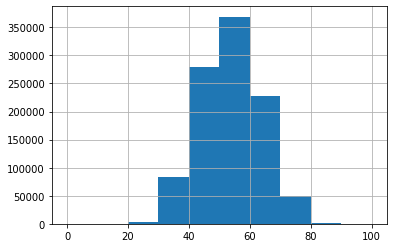

In [52]:
data["PUNT_LECTURA_CRITICA"].hist()

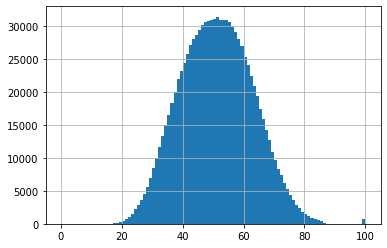

In [53]:
data["PUNT_MATEMATICAS"].hist(bins = 100)

In [54]:
data.groupby("PUNT_MATEMATICAS").size()

PUNT_MATEMATICAS
0          6
15        11
16        21
17        77
18       147
19       260
20       413
21       707
22      1006
23      1530
24      2189
25      2874
26      3623
27      4589
28      5628
29      6930
30      8411
31      9926
32     11642
33     13301
34     14968
35     16488
36     18272
37     20024
38     21938
39     23150
40     24453
41     25772
42     27210
43     28068
       ...  
59     26933
60     25288
61     24149
62     22502
63     20927
64     19414
65     17402
66     15844
67     14263
68     12690
69     10888
70      9628
71      8272
72      7350
73      6181
74      5307
75      4317
76      3574
77      2830
78      2329
79      1866
80      1459
81      1197
82       925
83       660
84       516
85       391
86        67
87         5
100      790
Length: 75, dtype: int64

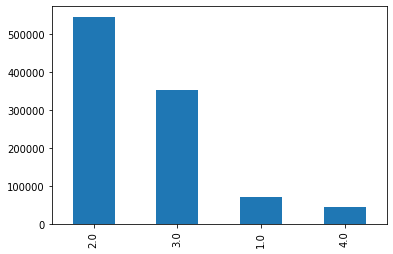

In [56]:
data["ESTU_NSE_ESTABLECIMIENTO"].value_counts().plot(kind ='bar')

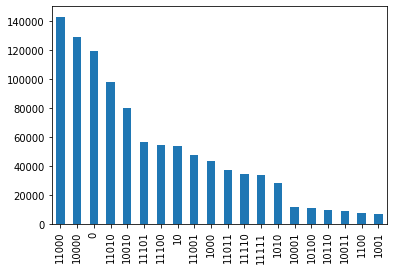

In [57]:
data["ELECTRODOMESTICOS"].value_counts().plot(kind ='bar')

In [58]:
data.groupby("ELECTRODOMESTICOS").size().sort_values(ascending=False)/data.shape[0]*100

ELECTRODOMESTICOS
11000    14.087395
10000    12.695222
0        11.784966
11010     9.678732
10010     7.873683
11101     5.564458
11100     5.365407
10        5.284349
11001     4.715168
1000      4.273238
11011     3.668896
11110     3.372044
11111     3.341314
1010      2.773611
10001     1.161901
10100     1.081335
10110     0.959994
10011     0.912915
1100      0.755231
1001      0.650140
dtype: float64

In [59]:
data.shape

(1015319, 31)

## Correlacion de pearson

In [60]:
print(data.PUNT_GLOBAL.corr(data.ESTU_INSE_INDIVIDUAL, method="pearson"))

0.43500586121610446


In [61]:
data.corr(method="pearson")

,ELECTRODOMESTICOS,ESTU_FECHANACIMIENTO,PERIODO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL
ELECTRODOMESTICOS,1.000000,-0.131716,0.006306,0.161448,0.163551,0.163479,0.148608,0.205841,0.181479,0.307328,0.519364
ESTU_FECHANACIMIENTO,-0.131716,1.000000,-0.003332,-0.262915,-0.301661,-0.288391,-0.243595,-0.265464,-0.304825,-0.150855,-0.230158
PERIODO,0.006306,-0.003332,1.000000,-0.033390,0.004813,-0.084233,-0.089920,0.046766,-0.046865,0.022286,-0.018594
PUNT_LECTURA_CRITICA,0.161448,-0.262915,-0.033390,1.000000,0.735875,0.749057,0.801586,0.659955,0.895540,0.382571,0.388588
PUNT_MATEMATICAS,0.163551,-0.301661,0.004813,0.735875,1.000000,0.797961,0.743861,0.662148,0.903941,0.373868,0.382591
PUNT_C_NATURALES,0.163479,-0.288391,-0.084233,0.749057,0.797961,1.000000,0.797822,0.680637,0.915557,0.360940,0.376359
PUNT_SOCIALES_CIUDADANAS,0.148608,-0.243595,-0.089920,0.801586,0.743861,0.797822,1.000000,0.669289,0.917890,0.370963,0.379762
PUNT_INGLES,0.205841,-0.265464,0.046766,0.659955,0.662148,0.680637,0.669289,1.000000,0.774099,0.471297,0.488992
PUNT_GLOBAL,0.181479,-0.304825,-0.046865,0.895540,0.903941,0.915557,0.917890,0.774099,1.000000,0.423465,0.435006
ESTU_NSE_ESTABLECIMIENTO,0.307328,-0.150855,0.022286,0.382571,0.373868,0.360940,0.370963,0.471297,0.423465,1.000000,0.630862


## Diagramas de caja

Text(0.5, 0, 'Edad')

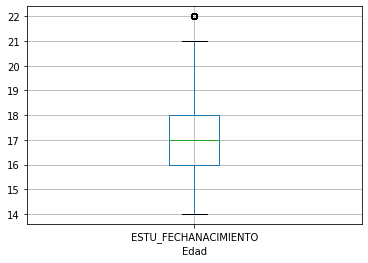

In [62]:
hist = data.boxplot(column=['ESTU_FECHANACIMIENTO'])
hist.set_xlabel("Edad")

In [63]:
dataAge = data[data['ESTU_FECHANACIMIENTO'] > 22]
dataAge.groupby("ESTU_FECHANACIMIENTO").size()/data.shape[0]*100

Series([], dtype: float64)

## Tablas de contingencia

In [65]:
pd.crosstab(data['FAMI_EDUCACIONPADRE'], [data['FAMI_EDUCACIONMADRE']])/data.shape[0]*100

FAMI_EDUCACIONMADRE,Educación profesional completa,Educación profesional incompleta,Ninguno,No Aplica,No sabe,Postgrado,Primaria completa,Primaria incompleta,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Técnica o tecnológica incompleta
FAMI_EDUCACIONPADRE,,,,,,,,,,,,
Educación profesional completa,3.958559,0.540126,0.028661,0.014675,0.113560,0.443309,0.192058,0.221310,1.517159,0.514321,1.297228,0.269275
Educación profesional incompleta,0.441142,0.331324,0.009849,0.006796,0.025017,0.094256,0.057814,0.056928,0.389730,0.168420,0.309656,0.102332
Ninguno,0.065300,0.023638,0.823091,0.008076,0.027775,0.010440,0.455719,0.995352,0.424497,0.429717,0.085884,0.048064
No Aplica,0.109818,0.027972,0.014183,0.043829,0.018418,0.028858,0.093961,0.129811,0.244652,0.141039,0.120159,0.035457
No sabe,0.609070,0.156306,0.057322,0.013592,0.915771,0.107651,0.509397,0.687272,1.466042,0.878739,0.626010,0.169011
Postgrado,0.508510,0.085293,0.003940,0.005122,0.020683,0.757693,0.022653,0.026987,0.147244,0.049837,0.172852,0.034767
Primaria completa,0.332211,0.092188,0.216681,0.011228,0.076922,0.044617,3.521061,1.837452,2.421111,1.720543,0.523481,0.186838
Primaria incompleta,0.428437,0.120750,0.587599,0.018418,0.122326,0.055845,3.051947,8.189249,3.192593,3.111140,0.682741,0.242091
Secundaria (Bachillerato) completa,1.846907,0.474137,0.146850,0.024327,0.198854,0.241599,1.490861,1.449988,10.112585,2.960055,2.518814,0.806840


In [66]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['FAMI_PERSONASHOGAR']])/data.shape[0]*100


FAMI_PERSONASHOGAR,1 a 2,3 a 4,5 a 6,7 a 8,9 o más
FAMI_ESTRATOVIVIENDA,,,,,
Estrato 1,2.171140,14.031058,11.970524,3.662987,1.395424
Estrato 2,2.708804,18.080721,11.849182,2.870920,1.119845
Estrato 3,1.628257,10.933116,6.024511,1.344504,0.561794
Estrato 4,0.394260,2.661331,1.270635,0.264449,0.114545
Estrato 5,0.131289,0.833334,0.437990,0.104105,0.044124
Estrato 6,0.057617,0.360576,0.224264,0.064709,0.037919
Sin Estrato,0.172557,0.886815,0.948372,0.413860,0.224461


In [77]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['ESTU_NSE_INDIVIDUAL']])/data.shape[0] * 100

ESTU_NSE_INDIVIDUAL,NSE1,NSE2,NSE3,NSE4
FAMI_ESTRATOVIVIENDA,,,,
Estrato 1,10.159664,16.574495,6.202386,0.294587
Estrato 2,3.615809,15.208619,16.384210,1.420834
Estrato 3,0.867609,4.560931,11.718780,3.344860
Estrato 4,0.243470,0.781626,1.753242,1.926882
Estrato 5,0.109128,0.341371,0.402041,0.698303
Estrato 6,0.073376,0.226924,0.161132,0.283655
Sin Estrato,1.137770,1.156779,0.319998,0.031517


In [78]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['COLE_AREA_UBICACION']])/data.shape[0] * 100

COLE_AREA_UBICACION,RURAL,URBANO
FAMI_ESTRATOVIVIENDA,,
Estrato 1,7.472430,25.758702
Estrato 2,4.033806,32.595667
Estrato 3,1.472641,19.019540
Estrato 4,0.519443,4.185778
Estrato 5,0.226136,1.324707
Estrato 6,0.141729,0.603357
Sin Estrato,1.109799,1.536266


In [84]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['ESTU_FECHANACIMIENTO']])

ESTU_FECHANACIMIENTO,14,15,16,17,18,19,20,21,22
FAMI_ESTRATOVIVIENDA,,,,,,,,,
Estrato 1,516,13173,113349,109769,60033,24672,9143,4201,2546
Estrato 2,454,13873,142786,122529,59571,21418,6612,2872,1791
Estrato 3,256,7260,83595,70324,31322,10358,2972,1222,752
Estrato 4,72,1523,19075,16726,6910,2248,705,306,208
Estrato 5,22,398,5299,5929,2665,893,315,139,86
Estrato 6,6,163,2081,2753,1596,566,232,117,51
Sin Estrato,50,912,6980,8201,5519,2874,1269,684,377


In [83]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['FAMI_NUMLIBROS']])

FAMI_NUMLIBROS,0 A 10 LIBROS,11 A 25 LIBROS,26 A 100 LIBROS,MÁS DE 100 LIBROS
FAMI_ESTRATOVIVIENDA,,,,
Estrato 1,174122,100539,49364,13377
Estrato 2,143415,123032,81871,23588
Estrato 3,58979,66029,60554,22499
Estrato 4,10184,13067,15904,8618
Estrato 5,3348,3927,5226,3245
Estrato 6,1841,1856,2186,1682
Sin Estrato,14953,7052,3299,1562


## Diagramas de dispersion

Text(0, 0.5, 'ESTU_INSE_INDIVIDUAL')

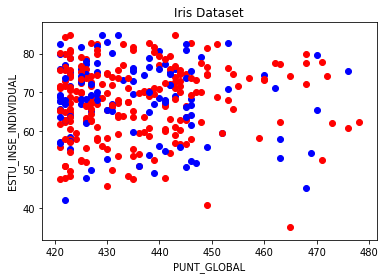

In [95]:
colors = {'M':'r', 'F':'b'}
fig, ax = plt.subplots()
for i in range(1000000):
    if data['PUNT_GLOBAL'][i] > 420:
        ax.scatter(data['PUNT_GLOBAL'][i], data['ESTU_INSE_INDIVIDUAL'][i],color=colors[data['ESTU_GENERO'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('PUNT_GLOBAL')
ax.set_ylabel('ESTU_INSE_INDIVIDUAL')

Text(0, 0.5, 'ESTU_INSE_INDIVIDUAL')

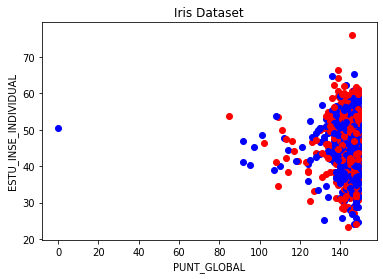

In [96]:
colors = {'M':'r', 'F':'b'}
fig, ax = plt.subplots()
for i in range(1000000):
    if data['PUNT_GLOBAL'][i] < 150:
        ax.scatter(data['PUNT_GLOBAL'][i], data['ESTU_INSE_INDIVIDUAL'][i],color=colors[data['ESTU_GENERO'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('PUNT_GLOBAL')
ax.set_ylabel('ESTU_INSE_INDIVIDUAL')

# Entropia

In [ ]:
columnEval = ["FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS"]

In [ ]:
def EntropySum(n):
    if n == 0:
        return 0
    if n == 1:
        return 0
    else:
        return n*math.log(n,2)+(1-n)*math.log(1-n,2)

def compare(i,j,colPass):
    count = 0
    for col in columnEval:
        if data.iloc[i][col] == data.iloc[j][col]:
            if col != colPass:
                count+=1
    return count

In [ ]:
entropy = 0
dataSize = 1000 #data.shape[0]
for i in range(dataSize):
    for j in range(i+1,dataSize):
        result = compare(i, j, "")
        entropy += EntropySum(result/data.shape[1])
        #if j%100 == 0:
        #    print("R",i,j,"=",result)
    print("R",i,j,"=",entropy)
print("EntropyTotal",entropy*-1)